# Mean-Variance Optimization of the Harvard Endowment

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel('multi_asset_etf_data.xlsx')
df

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,24710239,603516960768,The trust seeks to achieve its investment obje...
1,EFA,iShares MSCI EAFE ETF,ETF,USD,4818965,63209721856,The fund generally will invest at least 80% of...
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,8563600,17162833920,The fund generally will invest at least 80% of...
3,PSP,Invesco Global Listed Private E,ETF,USD,3622,258060880,The fund generally will invest at least 90% of...
4,QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,12559,696944896,"The fund is a ""fund of funds"" which means it i..."
5,HYG,iShares iBoxx $ High Yield Corp,ETF,USD,19724563,15944028160,The underlying index is a rules-based index co...
6,DBC,Invesco DB Commodity Index Trac,ETF,USD,184605,1142769792,The fund pursues its investment objective by i...
7,IYR,iShares U.S. Real Estate ETF,ETF,USD,2170005,3480166144,The fund seeks to track the investment results...
8,IEF,iShares 7-10 Year Treasury Bond,ETF,USD,5269754,34938195968,The underlying index measures the performance ...
9,BWX,SPDR Bloomberg International Tr,ETF,USD,155330,1423427840,"The fund generally invests substantially all, ..."


In [17]:
prices = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name='prices')
r = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name='total returns')
xr = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name='excess returns')
xr.set_index('Date', inplace=True)

In [18]:
prices = prices.drop('QAI', axis=1)
r = r.drop('QAI', axis=1)
xr = xr.drop('QAI', axis=1)

# 1. Summary Statistics

In [30]:
# Calculate and display the mean and volatility of each asset's excess return (Annualized)

mean_xr = xr.mean() * 12
vol = xr.std() * np.sqrt(12)

# Calculate Sharpe Ratio (Annualized)
sharpe = mean_xr / vol

combined = pd.concat([mean_xr, vol, sharpe], axis=1)
combined = combined.rename(columns={0:"Annualized Excess Return Mean", 1:"Annualized Excess Return Volatility", 2: "Annualized Sharpe Ratio"})
combined_ranked = combined.sort_values( by = "Annualized Sharpe Ratio", ascending = False)
combined_ranked

,Annualized Excess Return Mean,Annualized Excess Return Volatility,Annualized Sharpe Ratio
SPY,0.128141,0.142839,0.897103
HYG,0.041371,0.075928,0.544873
IYR,0.074916,0.168675,0.444143
PSP,0.092561,0.213370,0.433804
EFA,0.061775,0.150903,0.409372
TIP,0.020502,0.051115,0.401091
IEF,0.016404,0.063442,0.258569
EEM,0.029339,0.176164,0.166542
DBC,-0.005292,0.166553,-0.031774
BWX,-0.007716,0.082789,-0.093202


SPY has the best Sharpe Ratio with a value of 0.897103
BWX has the worst Sharpe Ratio with a value of -0.093202


## 2. Descriptive Analysis

Correlation Matrix of the Returns

In [20]:
corr_mat = xr.corr()
corr_mat

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,SPY,TIP
BWX,1.000000,0.191116,0.621673,0.602820,0.602555,0.580891,0.552557,0.526692,0.439994,0.675151
DBC,0.191116,1.000000,0.511667,0.500922,0.461887,-0.300207,0.280518,0.453303,0.432162,0.109006
EEM,0.621673,0.511667,1.000000,0.819925,0.691167,0.026704,0.584063,0.750109,0.687751,0.378792
EFA,0.602820,0.500922,0.819925,1.000000,0.787191,0.042639,0.699292,0.895320,0.845863,0.394821
HYG,0.602555,0.461887,0.691167,0.787191,1.000000,0.187258,0.739356,0.812157,0.793518,0.538648
IEF,0.580891,-0.300207,0.026704,0.042639,0.187258,1.000000,0.316532,0.022436,0.000815,0.754102
IYR,0.552557,0.280518,0.584063,0.699292,0.739356,0.316532,1.000000,0.749836,0.754711,0.598742
PSP,0.526692,0.453303,0.750109,0.895320,0.812157,0.022436,0.749836,1.000000,0.891687,0.408005
SPY,0.439994,0.432162,0.687751,0.845863,0.793518,0.000815,0.754711,0.891687,1.000000,0.381625
TIP,0.675151,0.109006,0.378792,0.394821,0.538648,0.754102,0.598742,0.408005,0.381625,1.000000


Highest and Lowest Correlation

In [21]:
# finding the highest and lowest correlation
filtered_mat = corr_mat.copy()
np.fill_diagonal(filtered_mat.values, np.nan)

max_value = filtered_mat.stack().max()
high_row, high_col = filtered_mat.stack().idxmax()

min_value = filtered_mat.stack().min()
low_row, low_col = filtered_mat.stack().idxmin()

print("Highest corellation of", max_value, "between ", high_row, " and ", high_col)
print("Lowest corellation of", min_value, "between ", low_row, " and ", low_col)

Highest corellation of 0.8953201243752301 between  EFA  and  PSP
Lowest corellation of -0.30020714105644963 between  DBC  and  IEF


From the summary statistics, we can see that TIPS outperform domestic bonds as TIP has both a higher mean return and a lower volatility than IEF, leading to a higher Sharpe ratio for TIPS. We can also see that TIPS strongly outperform foreign bonds as BWX has a negative mean return and therefore a negative Sharpe ratio. 

Correlation Heatmap of Excess Return

Text(0.5, 1.0, 'Correlation Heatmap of Excess Returns')

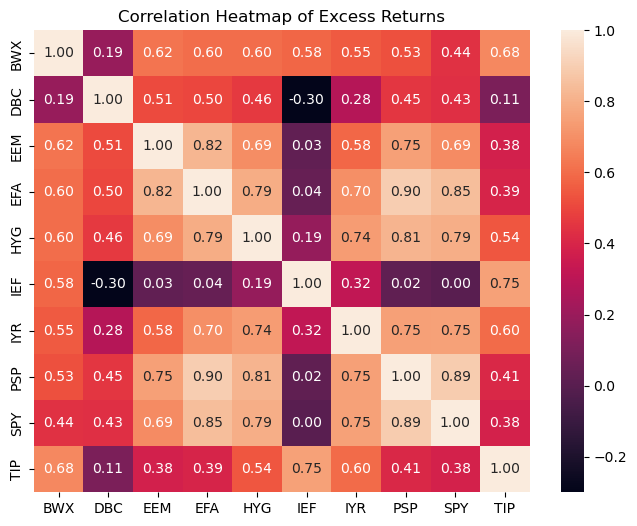

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Excess Returns')

## 3. MV Frontier
- Compute the mean, volatility, and Sharpe Ratio for the tangency portfolio

We use a closed-form $\delta_{\tan}$ for this part. Here is our derivation:

$$
\max_{w} \; \frac{w' \tilde{\mu}}{\sqrt{w' \Sigma w}}
\quad \text{s.t. } w' \mathbf{1} = 1
$$

Note that $\sqrt{w' \Sigma w}$ is a scalar (i.e., just a number), so it can go in denom, and we maximize Sharpe here (as opposed to minimizing variance with respect to a target mean).

$$
\mathcal{L}(w,\lambda) 
= 
\frac{w' \tilde{\mu}}{\sqrt{w' \Sigma w}} + \lambda(1 - w'\mathbf{1}) 
= 
\frac{(w' \tilde{\mu})^2}{w' \Sigma w} + \lambda(1 - w'\mathbf{1}).
$$

$$
\nabla_w \mathcal{L}
= 
\nabla_w \frac{(w' \tilde{\mu})^2}{w' \Sigma w} + \lambda(1 - w'\mathbf{1})
= 
\frac{2 w' \tilde{\mu} w' \Sigma w \tilde{\mu} - (w' \tilde{\mu})^2 (2 \Sigma w)}{(w' \Sigma w)^2} - \lambda \mathbf{1}
=
\frac{2 w' \tilde{\mu}}{(w' \Sigma w)^2}(w' \Sigma w \tilde{\mu} - w' \tilde{\mu} \Sigma w) - \lambda \mathbf{1}
=
0.
$$

$$
w' \left(\frac{2 w' \tilde{\mu}}{(w' \Sigma w)^2}(w' \Sigma w \tilde{\mu} - w' \tilde{\mu} \Sigma w) - \lambda \mathbf{1} \right)
= w' \cdot 0
$$

$$
\frac{2 w' \tilde{\mu}}{(w' \Sigma w)^2}(w' \Sigma w w' \tilde{\mu} - w' \tilde{\mu} w' \Sigma w) - \lambda w' \mathbf{1} = 0
$$

Substituting in based on constraint $w' \mathbf{1} = 1$:

$$
\frac{2 w' \tilde{\mu}}{(w' \Sigma w)^2}(w' \Sigma w w' \tilde{\mu} - w' \tilde{\mu} w' \Sigma w) - \lambda = 0 \Rightarrow \lambda = 0
$$

$$
\therefore \frac{2 w' \tilde{\mu}}{(w' \Sigma w)^2}(w' \Sigma w \tilde{\mu} - w' \tilde{\mu} \Sigma w) = 0
$$

$$
\therefore w' \Sigma w \tilde{\mu} - w' \tilde{\mu} \Sigma w = 0 \Rightarrow
w = \frac{w' \Sigma w}{w' \tilde{\mu}} \Sigma^{-1} \tilde{\mu},
$$

where we can rearrange

$$
\frac{w' \Sigma w}{w' \tilde{\mu}} = \frac{1}{\mathbf{1}' \Sigma^{-1} \tilde{\mu}} \; \text{ because } \; 
w' \mathbf{1} = 1 \rightarrow \mathbf{1}' w = 1 \rightarrow w^{-1} = \mathbf{1}.
$$

So, we have:

$$
w = \delta_{\tan} \Sigma^{-1} \tilde{\mu},
\quad
\delta_{\tan} = \frac{1}{\mathbf{1}' \Sigma^{-1} \tilde{\mu}}
$$

Weights of the tangency portfolios (ranked)

In [29]:
SIGMA = xr.cov().values
delta_tan = 1 / (np.ones(10).T @ np.linalg.inv(SIGMA) @ mean_xr.values)
w_tan = delta_tan * (np.linalg.inv(SIGMA) @ mean_xr.values)
w_vec = pd.DataFrame(w_tan, index=combined.index, columns=['Weights'])
w_vec_ranked = w_vec.sort_values(by = "Weights", ascending = False)
w_vec_ranked

,Weights
SPY,1.059632
IEF,0.881186
HYG,0.290614
TIP,0.175293
EFA,0.068682
EEM,0.026437
DBC,-0.071623
IYR,-0.246582
PSP,-0.332995
BWX,-0.850643


Comparison between the tangency portfolio weights and sharpe ratio

In [32]:
df_comparison = pd.concat([w_vec_ranked, combined_ranked["Annualized Sharpe Ratio"]], axis = 1)
df_comparison

,Weights,Annualized Sharpe Ratio
SPY,1.059632,0.897103
IEF,0.881186,0.258569
HYG,0.290614,0.544873
TIP,0.175293,0.401091
EFA,0.068682,0.409372
EEM,0.026437,0.166542
DBC,-0.071623,-0.031774
IYR,-0.246582,0.444143
PSP,-0.332995,0.433804
BWX,-0.850643,-0.093202


The tangency portfolios has the most weight in SPY, which has the highest Sharpe Ratio. Other than that, the weight ranking and the sharpe ranking ratio varies.

Mean, Volatility, and Sharpe Ratio of the Tangency Portfolio

In [43]:
w_port_ret = xr.values @ w_tan
w_mean_ret = w_port_ret.mean() * 12
port_vol = w_port_ret.std() * np.sqrt(12)
port_sharpe = w_mean_ret / port_vol
tan_performance = pd.DataFrame({'Mean Return': [w_mean_ret], 'Vol': [port_vol], 'Sharpe': [port_sharpe]}, index = ["Portfolio Performance"])
display(tan_performance)

mean_portfolio_ret = w_tan.T @ mean_xr.values
mean_portfolio_ret

,Mean Return,Vol,Sharpe
Portfolio Performance,0.12852,0.087222,1.47348


np.float64(0.1285204969860562)

## 4. TIPS
Comparison of the portfolio weight if TIPS are not included

In [54]:
# Dropped
no_tips = xr.drop('TIP', axis=1)
SIGMA_nt = no_tips.cov().values
mu = no_tips.mean() * 12

delta_tan = 1 / (np.ones(9).T @ np.linalg.inv(SIGMA_nt) @ mu.values)
w_no_tips = delta_tan * (np.linalg.inv(SIGMA_nt) @ mu.values)
w_vec_no_tips = pd.DataFrame(w_no_tips, index=mu.index, columns=['Weights (No TIPS)'])

combined = pd.concat([w_vec, w_vec_no_tips], axis = 1)
display(combined)

,Weights,Weights (No TIPS)
BWX,-0.850643,-0.879292
DBC,-0.071623,-0.063742
EEM,0.026437,0.032493
EFA,0.068682,0.060153
HYG,0.290614,0.316300
IEF,0.881186,1.019957
IYR,-0.246582,-0.247445
PSP,-0.332995,-0.339398
SPY,1.059632,1.100973
TIP,0.175293,NaN


Comparison of the Portfolio Performance With TIPS and Without TIPS

In [55]:
no_tips_port_ret = no_tips.values @ w_no_tips
no_tips_mean_ret = no_tips_port_ret.mean() * 12
no_tips_port_vol = no_tips_port_ret.std() * np.sqrt(12)
no_tips_port_sharpe = no_tips_mean_ret / no_tips_port_vol
no_tips_performance = pd.DataFrame({'Mean Return': [no_tips_mean_ret], 'Vol': [no_tips_port_vol], 'Sharpe': [no_tips_port_sharpe]}, index = ["No Tips Performance"])

combined_performance = pd.concat([tan_performance, no_tips_performance])
combined_performance

,Mean Return,Vol,Sharpe
Portfolio Performance,0.128520,0.087222,1.473480
No Tips Performance,0.132736,0.090189,1.471758


Based on the Sharpe Ratio, the original portfolio performed better than the portfolio without TIPS.

Comparison of the portfolio weights if the TIPS excess return is 0.0012 higher than historic

In [52]:
# E[excess return] increases by .0012
xr_inc = xr.copy()
xr_inc['TIP'] = xr_inc['TIP'] + 0.0012
SIGMA_ = xr_inc.cov().values
mu_inc = xr_inc.mean() * 12

delta_tan = 1 / (np.ones(10).T @ np.linalg.inv(SIGMA_) @ mu_inc.values)
w_inc = delta_tan * (np.linalg.inv(SIGMA_) @ mu_inc.values)
w_vec_inc = pd.DataFrame(w_inc, index=mu_inc.index, columns=['Weights (Increased TIPS)'])

combined = pd.concat([w_vec, w_vec_inc], axis = 1)
display(combined)

,Weights,Weights (Increased TIPS)
BWX,-0.850643,-0.669693
DBC,-0.071623,-0.121397
EEM,0.026437,-0.011815
EFA,0.068682,0.122554
HYG,0.290614,0.128372
IEF,0.881186,0.004667
IYR,-0.246582,-0.241132
PSP,-0.332995,-0.292555
SPY,1.059632,0.798513
TIP,0.175293,1.282487


In [58]:
tips_inc_port_ret = xr_inc.values @ w_inc
tips_inc_mean_ret = tips_inc_port_ret.mean() * 12
tips_inc_port_vol = tips_inc_port_ret.std() * np.sqrt(12)
tips_inc_port_sharpe = tips_inc_mean_ret / tips_inc_port_vol
tips_inc_performance = pd.DataFrame({'Mean Return': [tips_inc_mean_ret], 'Vol': [tips_inc_port_vol], 'Sharpe': [tips_inc_port_sharpe]}, index = ["TIPS increased Performance"])

combined_performance = pd.concat([tan_performance, tips_inc_performance])
combined_performance

,Mean Return,Vol,Sharpe
Portfolio Performance,0.128520,0.087222,1.473480
TIPS increased Performance,0.120361,0.074430,1.617104


Based on the Sharpe Ratio, the portfolio with increased TIPS excess return performed better than the original portfolio

Since the portfolio that contained TIPS has better performance than the one that doesn't include TIPS, Harvard should consider them in a seperate asset class in its portfolio decisions rather than lumping them with other fixed income asset.

# Allocations
investor now has a targeted mean excess return (per month) of 0.01

1. Equally - weighted (EW)

In [164]:
w_ew = np.ones(10) / 10
delta_ew = 0.01 / (xr.mean() @ w_ew)
w_ew = delta_ew * w_ew
w_ew

w_ew_ret = xr.values @ w_ew
w_ew_mean_ret = w_ew_ret.mean() * 12
ew_vol = w_ew_ret.std() * np.sqrt(12)
ew_sharpe = w_ew_mean_ret / ew_vol
ew_performance = pd.DataFrame({'Mean Return': [w_ew_mean_ret], 'Vol': [ew_vol], 'Sharpe': [ew_sharpe]})

2. Risk - parity

In [163]:
w_rp = np.array(1 / np.sqrt(np.diag(xr.cov())))
delta_rp = 0.01 / (xr.mean() @ w_rp)
w_rp = delta_rp * w_rp

w_rp_ret = xr.values @ w_rp
w_rp_mean_ret = w_rp_ret.mean() * 12
rp_vol = w_rp_ret.std() * np.sqrt(12)
rp_sharpe = w_rp_mean_ret / rp_vol
rp_performance = pd.DataFrame({'Mean Return': [w_rp_mean_ret], 'Vol': [rp_vol], 'Sharpe': [rp_sharpe]})

3. Mean Variance (MV)

## Comparison of the Different Allocation Methods

Comparison of the weight

In [162]:
delta_target = 0.01 / (xr.mean() @ w_tan)
w_target = delta_target * w_tan

w_target_ret = xr.values @ w_target
w_target_mean_ret = w_target_ret.mean() * 12
target_vol = w_target_ret.std() * np.sqrt(12)
target_sharpe = w_target_mean_ret / target_vol
target_performance = pd.DataFrame({'Mean Return': [w_target_mean_ret], 'Vol': [target_vol], 'Sharpe': [target_sharpe]})

In [165]:
weights = pd.DataFrame({"Equally-Weighted":w_ew, "Risk-Parity": w_rp, "Tangency": w_tan, "Target":w_target}, index=combined.index)
weights

,Equally-Weighted,Risk-Parity,Tangency,Target
BWX,0.265486,0.422521,-0.850643,-0.794248
DBC,0.265486,0.210024,-0.071623,-0.066874
EEM,0.265486,0.198565,0.026437,0.024684
EFA,0.265486,0.231805,0.068682,0.064129
HYG,0.265486,0.460702,0.290614,0.271347
IEF,0.265486,0.551374,0.881186,0.822766
IYR,0.265486,0.207381,-0.246582,-0.230235
PSP,0.265486,0.163941,-0.332995,-0.310919
SPY,0.265486,0.244892,1.059632,0.989382
TIP,0.265486,0.684338,0.175293,0.163671


Performance of each of the portfolios over the sample:
- Mean
- Volatility
- Sharpe Ratio

In [177]:
performance = pd.concat([ew_performance, rp_performance, tan_performance, target_performance], axis=0)
performance = performance.set_index(np.array(["EW Portfolio", "RP Portfolio", "Tangent Portfolio", "Target Portfolio"]))
performance

,Mean Return,Vol,Sharpe
EW Portfolio,0.12000,0.268464,0.446988
RP Portfolio,0.12000,0.260052,0.461447
Tangent Portfolio,0.12852,0.087222,1.473480
Target Portfolio,0.12000,0.081440,1.473480


The Tangent Portfolio (Mean Variance Optimization) haas the same sharpe as the Target Portfolio. The Risk Parity Portfolio and the Equally-weighted portfolio has worse performance